In [1]:
import magen.solver as solver
from magen.models import chain
from magen.optimizer import BayesianOptimizer
# from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from magen.aux_func import load_experiment_data

In [2]:
from magen import optimizer

In [3]:
experimental_files = {'T':'./Data/demo_data/T.csv',
                     'C':'./Data/demo_data/C.csv',
                     'Chiz':'./Data/demo_data/Chiz.csv',
                     'Chixy':'./Data/demo_data/Chixy.csv'}

exp_thermal_data = load_experiment_data(experimental_files)

In [4]:
mymodel = chain.XYZSpinChain(l=8)
interactions = mymodel.generate_interactions(Jx=1., Jz=1., Jy=1.)

In [5]:
mysolver = solver.EDSolver(size=mymodel.l)
# mysolver.get_hamiltonian_matrix(interactions)

In [6]:
thermal_data = mysolver.forward(interactions, T=exp_thermal_data.T, with_chi_para=True)

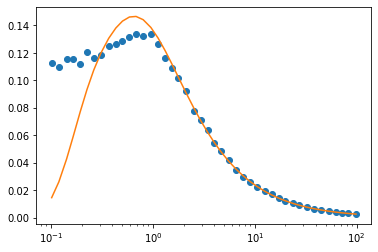

In [7]:
plt.semilogx(exp_thermal_data.T, exp_thermal_data.Chixy, 'o')
plt.semilogx(exp_thermal_data.T, thermal_data.Chixy.detach())

In [11]:
Opt = BayesianOptimizer(parameter_space={'Jx':(-10, 10), 'Jy':(-10, 10), 'Jz':(-10, 10)},
                        n_exp_total=300,
                        solver=solver.EDSolver(size=mymodel.l, cal_chi_para=True),
                        model=mymodel,
                        T_cut=0,
                        exp_thermal_data=exp_thermal_data,
                        record_BO = True,
                        target_obs=['C', 'Chiz', 'Chixy'])

In [12]:
import magen

In [13]:
res = Opt.minimize(log_accelerate=False)

iteration 1: Loss = -0.0444635975443514, Parameter is {'Jx': 7.020564808029032, 'Jy': -7.771772648003723, 'Jz': 3.4293536832410787}
iteration 2: Loss = -0.2007623284030666, Parameter is {'Jx': -0.2527815856675186, 'Jy': 2.067589921872571, 'Jz': -8.44673611280741}
iteration 3: Loss = -0.08370713399572739, Parameter is {'Jx': -3.063777515410626, 'Jy': -9.211117653592265, 'Jz': 7.747297152304988}
iteration 4: Loss = -0.08156935239934154, Parameter is {'Jx': 4.195338904230896, 'Jy': 7.791085767632808, 'Jz': 4.971056710507714}
iteration 5: Loss = -0.09288304671284153, Parameter is {'Jx': -5.0790684313683325, 'Jy': -4.805304073903165, 'Jz': 1.7655305336691658}
iteration 6: Loss = -0.28100645963533405, Parameter is {'Jx': -7.940535246929099, 'Jy': -0.7732134945479494, 'Jz': -5.3008906387784505}
iteration 7: Loss = -0.255932041908316, Parameter is {'Jx': 1.5574913760388718, 'Jy': -1.4856823187243542, 'Jz': -9.603108656101519}
iteration 8: Loss = -0.0494219467855682, Parameter is {'Jx': 3.01897

iteration 63: Loss = -2.410679262519793e-05, Parameter is {'Jx': 0.8518179623337971, 'Jy': 0.8573518107557181, 'Jz': 1.732190727256338}
iteration 64: Loss = -0.00024103423600537133, Parameter is {'Jx': 0.622274071098257, 'Jy': 0.027796438687563096, 'Jz': 1.8895878660567114}
iteration 65: Loss = -1.1130772529817848e-05, Parameter is {'Jx': 0.8893160900087675, 'Jy': 1.0270060355167558, 'Jz': 1.5665559109557883}
iteration 66: Loss = -0.00026981755324354407, Parameter is {'Jx': 0.7577987568511357, 'Jy': -0.7232529948839357, 'Jz': 2.46636573722801}
iteration 67: Loss = -0.1536791467215112, Parameter is {'Jx': 9.985770167967626, 'Jy': -9.68925063681585, 'Jz': -9.331782234402933}
iteration 68: Loss = -0.0002467540877108721, Parameter is {'Jx': 1.5009046512712594, 'Jy': 0.8310100508357223, 'Jz': 1.459665727453494}
iteration 69: Loss = -0.17912274965868377, Parameter is {'Jx': -9.860050552609675, 'Jy': 3.4598414763723913, 'Jz': 9.795947501855775}
iteration 70: Loss = -0.0017304683296518806, Par

iteration 123: Loss = -0.0007280220905017606, Parameter is {'Jx': 0.5087525426863575, 'Jy': -2.088065759872622, 'Jz': 0.10632150151536912}
iteration 124: Loss = -0.0009250358477760225, Parameter is {'Jx': 0.06786559148872229, 'Jy': -1.784901537014619, 'Jz': 0.8356399178533813}
iteration 125: Loss = -0.008079996406439891, Parameter is {'Jx': -0.737371444402136, 'Jy': 3.1694298915420624, 'Jz': 3.472747726350322}
iteration 126: Loss = -0.000160912943370891, Parameter is {'Jx': 0.6098621436210312, 'Jy': 0.5999136739991879, 'Jz': 2.1290827678034354}
iteration 127: Loss = -7.35504258047003e-05, Parameter is {'Jx': 0.9466944661079495, 'Jy': -0.3927923915365099, 'Jz': 2.155439185903864}
iteration 128: Loss = -2.7292900775426934e-05, Parameter is {'Jx': 1.1514522342962774, 'Jy': 0.7943456856793709, 'Jz': 1.517362982655186}
iteration 129: Loss = -0.00023925103862278496, Parameter is {'Jx': 0.5135536632557773, 'Jy': 0.1927509457392489, 'Jz': 2.2953195132024433}
iteration 130: Loss = -0.0001239575

iteration 183: Loss = -0.0035958925840227206, Parameter is {'Jx': 0.6990575918972493, 'Jy': -3.391084970698854, 'Jz': 1.0624986123665803}
iteration 184: Loss = -0.0001041062466118243, Parameter is {'Jx': 0.5328417848887845, 'Jy': 0.9393540233796323, 'Jz': 1.7832075551240614}
iteration 185: Loss = -8.26872801808817e-05, Parameter is {'Jx': 0.9548729634151432, 'Jy': -2.0533078703209195, 'Jz': 1.4128037960114028}
iteration 186: Loss = -3.265691345793569e-05, Parameter is {'Jx': 0.8235415701634974, 'Jy': 1.3548334805678337, 'Jz': 1.208503568818692}
iteration 187: Loss = -0.00048618051513018884, Parameter is {'Jx': 0.16201895198509497, 'Jy': 0.4865885398401204, 'Jz': 1.963852858495736}
iteration 188: Loss = -0.0001999880200561105, Parameter is {'Jx': 0.8240448114116674, 'Jy': -0.11307427620803345, 'Jz': 2.3433837607829204}
iteration 189: Loss = -4.356902798518234e-05, Parameter is {'Jx': 0.782686964841453, 'Jy': 1.1143582327335633, 'Jz': 1.6803314147163881}
iteration 190: Loss = -0.00064321

iteration 243: Loss = -0.00010706588835978372, Parameter is {'Jx': 0.9545560181780992, 'Jy': -1.6998672970781836, 'Jz': 2.1375249594844554}
iteration 244: Loss = -8.464754892652058e-05, Parameter is {'Jx': 1.191722775444429, 'Jy': -0.6006999184916051, 'Jz': 2.080263600830804}
iteration 245: Loss = -0.00011272201259113013, Parameter is {'Jx': 1.0821701003807362, 'Jy': -0.05220243530952473, 'Jz': 1.7831802532700074}
iteration 246: Loss = -0.0001510371329697061, Parameter is {'Jx': 0.823929967861897, 'Jy': -2.3579041770653024, 'Jz': 1.2597232799184699}
iteration 247: Loss = -0.017749221908445405, Parameter is {'Jx': -2.488672456518639, 'Jy': 5.331814148805998, 'Jz': 3.7330941930273447}
iteration 248: Loss = -0.0001460387028702143, Parameter is {'Jx': 1.346648514527235, 'Jy': -1.2458852574445896, 'Jz': 2.172803075438196}
iteration 249: Loss = -5.344635984012388e-05, Parameter is {'Jx': 0.7904725820051279, 'Jy': 0.9121781186319957, 'Jz': 1.81297169112635}
iteration 250: Loss = -0.0082968270

In [14]:
from visualize import plot_funcs_2d

(<Figure size 360x360 with 2 Axes>, <AxesSubplot:xlabel='Jx', ylabel='Jz'>)

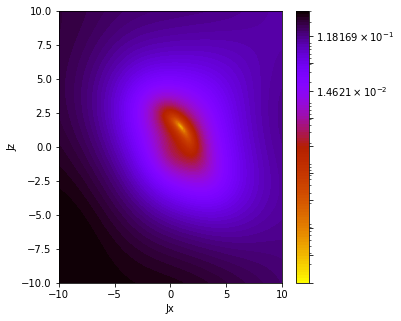

In [17]:
plot_funcs_2d.show_landscape(res, ['Jx', 'Jz'], itr=-1)

In [18]:
from visualize import plot_funcs_3d

In [15]:
print('   o')
print('  / \  ...  |  | ')
print('-o - o- ... -o--o-')

   o
  / \  ...  |  | 
-o - o- ... -o--o-


In [16]:
class Animal:
    
    def __init__(self):
        pass
    
class Dog(Animal):
    
    def __init__(self):
        pass
    


In [17]:
mydog = Dog()
mycat = Animal()

In [18]:
isinstance(mydog, Dog)

True

In [19]:
isinstance(mycat, Dog)

False